# Gaussian Naive Bayes

In [1]:

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
import sys
sys.path.append("../..//my-staff")
from utils import load_ds

# Cargar dataset

In [2]:
X, y, features_names, class_names = load_ds("all")
X.shape

(293, 25)

In [3]:
X_train, y_train, _, _ = load_ds("train")
X_train.shape

(205, 25)

In [4]:
X_test, y_test, _, _ = load_ds("test")
X_test.shape

(88, 25)

In [5]:
from utils import grid_search_no_fss, SEED

In [7]:
model = AdaBoostClassifier()

In [15]:
param_grid = {
    'n_estimators': [50, 70, 90],  # Número de estimadores
    'learning_rate': [0.01, 0.1],  # Tasa de aprendizaje
    'algorithm': ['SAMME', 'SAMME.R']  # Algoritmo
}


In [16]:
result = grid_search_no_fss(X_train, y_train, model, param_grid)

Starting evaluation with all variables
f1 0.7340821812596007


In [11]:
result

ResultGridSearch(best_model=AdaBoostClassifier(learning_rate=0.1, n_estimators=60), best_num_features=205, selected_feature_names=['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Ascites_N', 'Ascites_Y', 'Drug_D-penicillamine', 'Drug_Placebo', 'Spiders_N', 'Spiders_Y', 'Sex_F', 'Sex_M', 'Edema_N', 'Edema_S', 'Edema_Y'], best_score=0.7191905615292713)

In [17]:
best_model = result.best_model

In [18]:
hipers = best_model.get_params()
hipers

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 70,
 'random_state': None}

In [19]:
features = result.selected_feature_names
features

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Ascites_N',
 'Ascites_Y',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Spiders_N',
 'Spiders_Y',
 'Sex_F',
 'Sex_M',
 'Edema_N',
 'Edema_S',
 'Edema_Y']

# Training the model

In [20]:
model = AdaBoostClassifier(**hipers)

In [21]:
model.fit(X_train[features], y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=70)

# Evaluation

In [22]:
from utils import eval_model


In [23]:
print("Training score: ", model.score(X_train[features], y_train))
print("Test score: ", model.score(X_test[features], y_test))

Training score:  0.8926829268292683
Test score:  0.8068181818181818


In [24]:
y_prob = model.predict_proba(X_test[features])[:,0]
y_pred = model.predict(X_test[features])
eval_model(y_true= y_test, y_pred=y_pred, y_prob=y_prob)

Métricas de evaluación:
Precision: 0.8064
Recall: 0.8068
F1-score: 0.8065
Brier Score: 0.3201


# Visualización del modelo

# Evaluation good

In [25]:
from sklearn.model_selection import StratifiedKFold, permutation_test_score
from globals import K_FOLD
import matplotlib.pyplot as plt


In [26]:

m = AdaBoostClassifier(**hipers)
cv = StratifiedKFold(K_FOLD, shuffle=True, random_state=0)

score, perm_score, pvalue = permutation_test_score(
    m, X[features], y, scoring="f1", cv=cv, n_permutations=500, n_jobs=-1
)


Score on original
data f1: 0.74
(p-value: 0.002)


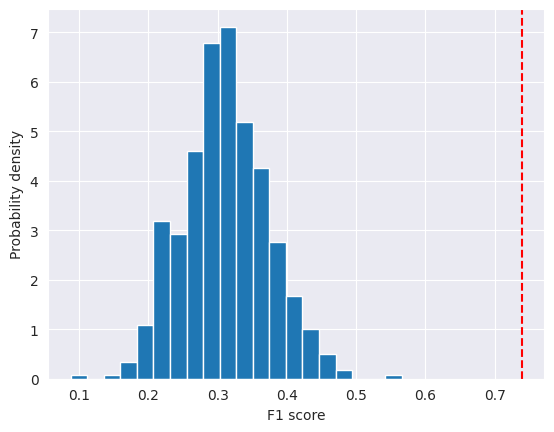

In [27]:
fig, ax = plt.subplots()

print(f"Score on original\ndata f1: {score:.2f}\n(p-value: {pvalue:.3f})"
)
ax.hist(perm_score, bins=20, density=True)
ax.axvline(score, ls="--", color="r")
ax.set_xlabel("F1 score")
_ = ax.set_ylabel("Probability density")